In [195]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk

### Explore alignment of images and masks

In [196]:
def is_image_file(filename):
    return any(filename.endswith(extension) for extension in [".nii.gz", ".dcm"])

def get_dicom_dirs(parent_folder):
    """
    Get most-down directories of all dicom sequences under parent folder
    :param parent_folder: parent folder of image set
    :return: List of most-down directories containing .dcm sequences
    """
    res = []
    for dirpath, dirnames, filenames in os.walk(parent_folder):
        if not dirnames and len(filenames) > 0 and is_image_file(filenames[0]):
            res.append(dirpath)
    return res

def get_nifti_files(parent_folder):
    """
    Get all NifTi files under parent folder
    :param parent_folder: parent folder of NifTi files
    :return: List of NifTi files
    """
    res = []
    for dirpath, dirnames, filenames in os.walk(parent_folder):
        for file in filenames:
            if file.endswith(".nii.gz"):
                res.append(os.path.join(dirpath, file))
    return res

def sitk_resample(image, new_spacing=[2,2,2]):
    resample = sitk.ResampleImageFilter()
    resample.SetInterpolator(sitk.sitkLinear)
    resample.SetOutputDirection(image.GetDirection())
    resample.SetOutputOrigin(image.GetOrigin())
    new_spacing = [2, 2, 2]
    resample.SetOutputSpacing(new_spacing)

    orig_size = np.array(image.GetSize(), dtype=np.int)
    orig_spacing = image.GetSpacing()
    new_size = [orig_size[i]*(orig_spacing[i]/new_spacing[i]) for i in range(len(orig_size))]
    new_size = np.ceil(new_size).astype(np.int)
    new_size = [int(s) for s in new_size]
    resample.SetSize(new_size)
    return resample.Execute(image)
    
def load_dicom_dir(dicom_path, resample=True):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(dicom_path)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    if resample:
        image = sitk_resample(image)
    image = sitk.GetArrayFromImage(image)[::-1]
    image = np.flip(image, axis=0)
    image = np.rot90(image, k=2, axes=(1,2))
    return image.copy()

def load_nifti_mask(mask_path, resample=True):
    mask = sitk.ReadImage(mask_path)
    if resample:
        mask = sitk_resample(mask)
    mask = sitk.GetArrayFromImage(mask)
    mask = np.rot90(mask, k=2, axes=(1,2))
    return mask.copy()

In [194]:
root_path = r"D:\CT-82"
dicom_dirs = sorted(get_dicom_dirs(os.path.join(root_path, 'image')))
mask_dirs = sorted(get_nifti_files(os.path.join(root_path, 'label')))

for dicom_path, mask_path in zip(dicom_dirs, mask_dirs):
    img = load_dicom_dir(dicom_path)
    mask = load_niti_mask(mask_path)
    print("Image {}: image shape: {}, mask shape: {}".format(os.path.basename(mask_path), img.shape, mask.shape))
    if mask.shape != img.shape:
        print("Shape mismatch")

Image label0001.nii.gz: image shape: (120, 220, 220), mask shape: (120, 220, 220)
Image label0002.nii.gz: image shape: (98, 230, 230), mask shape: (98, 230, 230)
Image label0003.nii.gz: image shape: (108, 170, 170), mask shape: (108, 170, 170)
Image label0004.nii.gz: image shape: (111, 230, 230), mask shape: (111, 230, 230)
Image label0005.nii.gz: image shape: (105, 220, 220), mask shape: (105, 220, 220)
Image label0006.nii.gz: image shape: (112, 240, 240), mask shape: (112, 240, 240)
Image label0007.nii.gz: image shape: (101, 240, 240), mask shape: (101, 240, 240)
Image label0008.nii.gz: image shape: (103, 210, 210), mask shape: (103, 210, 210)
Image label0009.nii.gz: image shape: (98, 220, 220), mask shape: (98, 220, 220)
Image label0010.nii.gz: image shape: (103, 238, 238), mask shape: (103, 238, 238)
Image label0011.nii.gz: image shape: (111, 231, 231), mask shape: (111, 231, 231)
Image label0012.nii.gz: image shape: (107, 250, 250), mask shape: (107, 250, 250)
Image label0013.nii.

In [197]:
img = load_dicom_dir(r"D:\CT-82\image\PANCREAS_0017\11-24-2015-PANCREAS0017-Pancreas-97462\Pancreas-61612")
mask = load_nifti_mask(r"D:\CT-82\label\label0017.nii.gz")

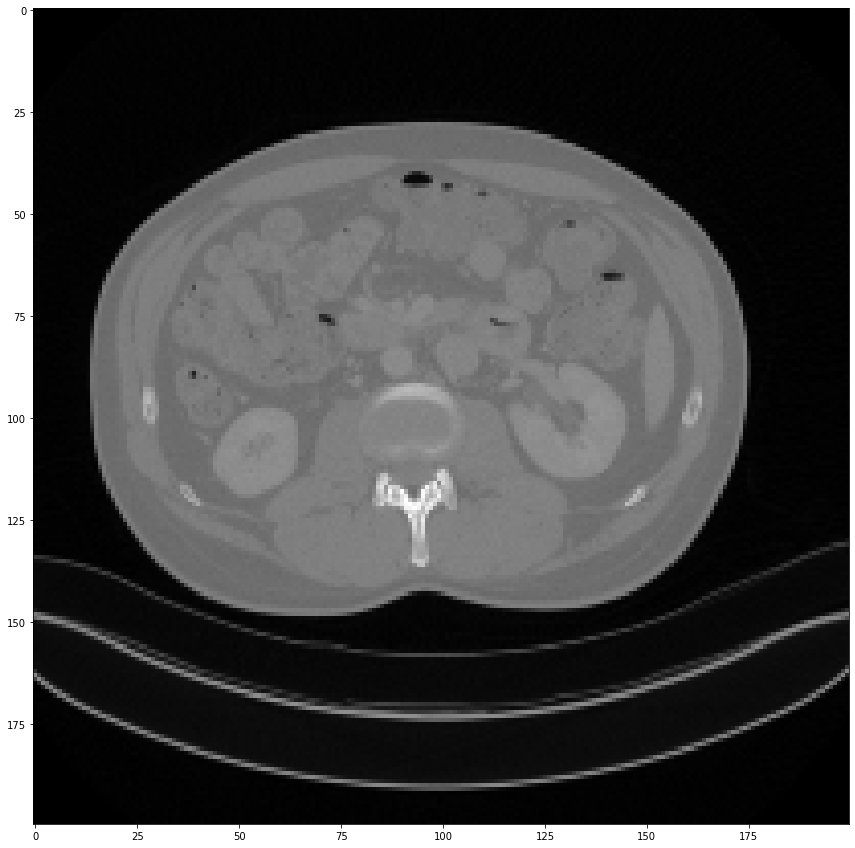

In [214]:
fig, ax = plt.subplots(figsize=(15, 15))
ii = 100

ax.imshow(img[ii], cmap='gray')
# ax.imshow(mask[ii], alpha=0.1, cmap='Purples')

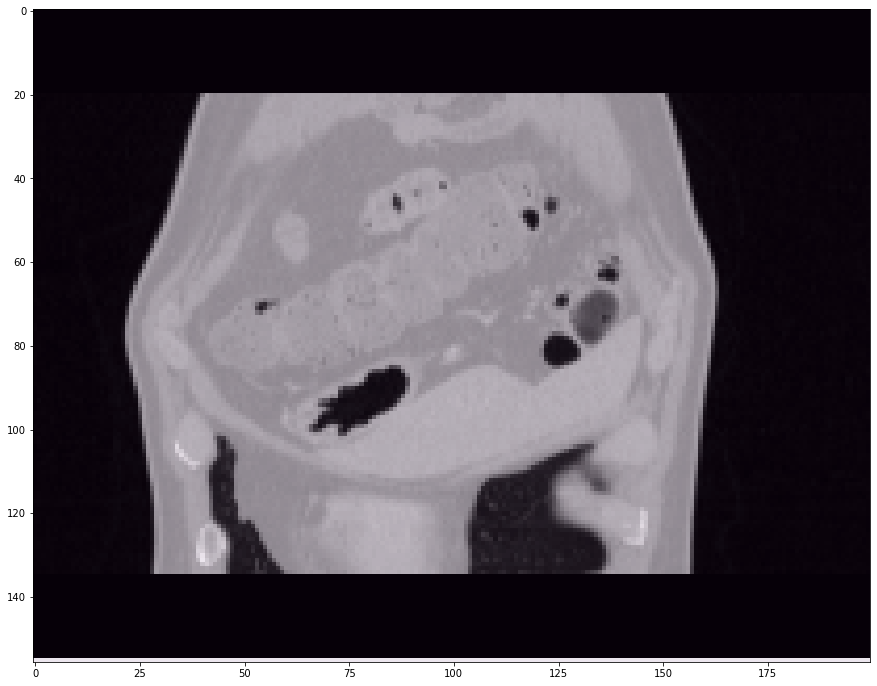

In [218]:
fig, ax = plt.subplots(figsize=(15, 15))
ii = 50

ax.imshow(np.rot90(img, k=-1, axes=(0,1))[ii], cmap='gray')
ax.imshow(np.rot90(mask, k=-1, axes=(0,1))[ii], alpha=0.1, cmap='viridis')

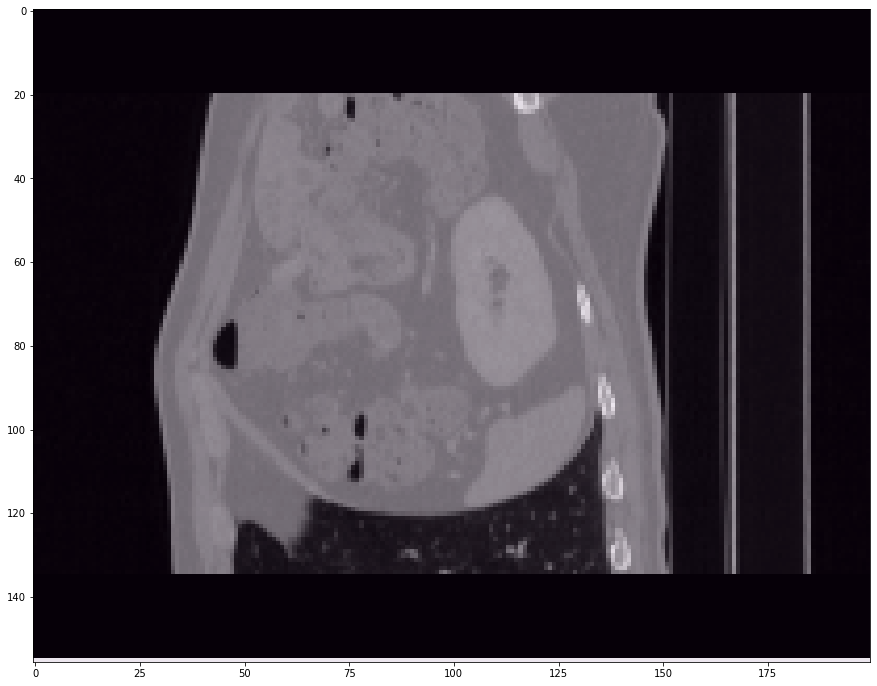

In [219]:
fig, ax = plt.subplots(figsize=(15, 15))
ii = 50

ax.imshow(np.rot90(img, k=3, axes=(0,2))[ii].T, cmap='gray')
ax.imshow(np.rot90(mask, k=3, axes=(0,2))[ii].T, alpha=0.1, cmap='viridis')

### Explore alignment of images and masks after torch transformations

In [186]:
img = np.load("test_image_1.npy")[0]
mask = np.load("test_label_1.npy")[0]

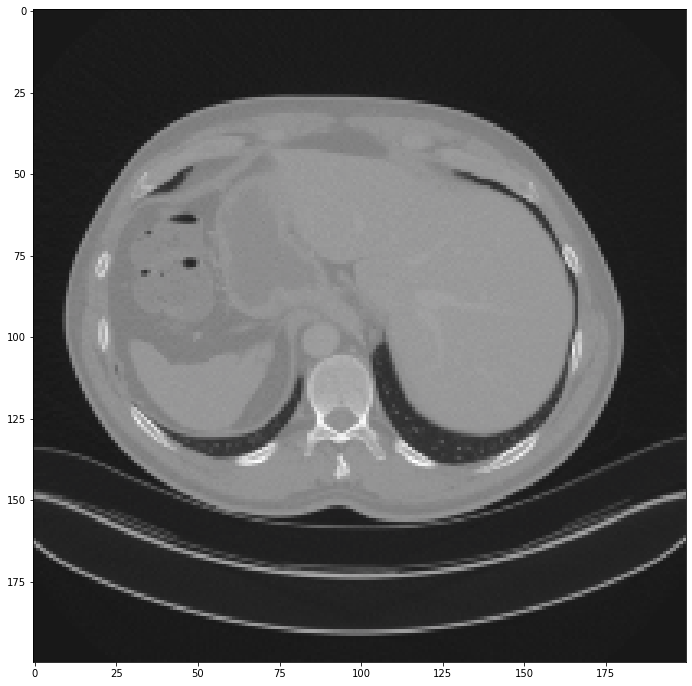

In [216]:
fig, ax = plt.subplots(figsize=(12, 12))
ii = 50

ax.imshow(img[ii], cmap="gray")
ax.imshow(mask[ii], cmap="Purples", alpha=0.1)